# Bar Plot - Y Harsha Vardhana Reddy,25198
# Government R&D Expenditure Analysis

This notebook analyzes government expenditure on Research and Development across different economic activities and creates visualizations to understand spending patterns.

## 1. Import Required Libraries

Import matplotlib, pandas, and numpy for data visualization and manipulation.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Prepare Data

Load government R&D expenditure data from the CSV file and prepare it for visualization.

In [10]:
# Load the data
df = pd.read_csv('Government Exp on R&D.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (21, 6)

Column Names:
['S.No.', 'Economic Activity', 'NIC Code', 'Research & Development Expenditure (2018-19)', 'Research & Development Expenditure (2019-20)', 'Research & Development Expenditure (2020-21)']

First few rows:


,S.No.,Economic Activity,NIC Code,Research & Development Expenditure (2018-19),Research & Development Expenditure (2019-20),Research & Development Expenditure (2020-21)
0,1.0,"Agriculture, Forestry and Fishing",1.0,12357.05,12743.11,12826.38
1,2.0,Mining and Quarrying,5.0,1257.65,1378.42,1256.25
2,3.0,Manufacture of Food Products,10.0,108.47,123.75,78.13
3,4.0,Manufacture of Textiles,13.0,86.10,83.61,56.71
4,5.0,Manufacture of Wood and of Products of Wood & ...,16.0,12.04,11.12,10.21


In [11]:
# Clean the data - remove the 'Total' row and handle any missing values
df_clean = df[df['Economic Activity'] != 'Total'].copy()
df_clean = df_clean.dropna()

# Display cleaned data info
print("Cleaned Dataset Shape:", df_clean.shape)
print("\nData types:")
print(df_clean.dtypes)
print("\nSample of cleaned data:")
df_clean.head(10)

Cleaned Dataset Shape: (20, 6)

Data types:
S.No.                                           float64
Economic Activity                                object
NIC Code                                        float64
Research & Development Expenditure (2018-19)    float64
Research & Development Expenditure (2019-20)    float64
Research & Development Expenditure (2020-21)    float64
dtype: object

Sample of cleaned data:


,S.No.,Economic Activity,NIC Code,Research & Development Expenditure (2018-19),Research & Development Expenditure (2019-20),Research & Development Expenditure (2020-21)
0,1.0,"Agriculture, Forestry and Fishing",1.0,12357.05,12743.11,12826.38
1,2.0,Mining and Quarrying,5.0,1257.65,1378.42,1256.25
2,3.0,Manufacture of Food Products,10.0,108.47,123.75,78.13
3,4.0,Manufacture of Textiles,13.0,86.10,83.61,56.71
4,5.0,Manufacture of Wood and of Products of Wood & ...,16.0,12.04,11.12,10.21
5,6.0,Manufacture of Chemicals and Chemical Products,20.0,79.64,74.31,31.51
6,7.0,Manufacture of Basic Pharmaceutical Products a...,21.0,17.81,23.51,28.05
7,8.0,Manufacture of Rubber and Plastic Products,22.0,13.33,13.44,13.44
8,9.0,Manufacture of Basic Metals,24.0,0.99,1.82,0.04
9,10.0,"Manufacture of Computer, Electronic and other ...",26.0,3.78,3.22,3.37


## 3. Create Basic Bar Chart

Use matplotlib to create a basic bar chart showing government R&D expenditure by economic activity.

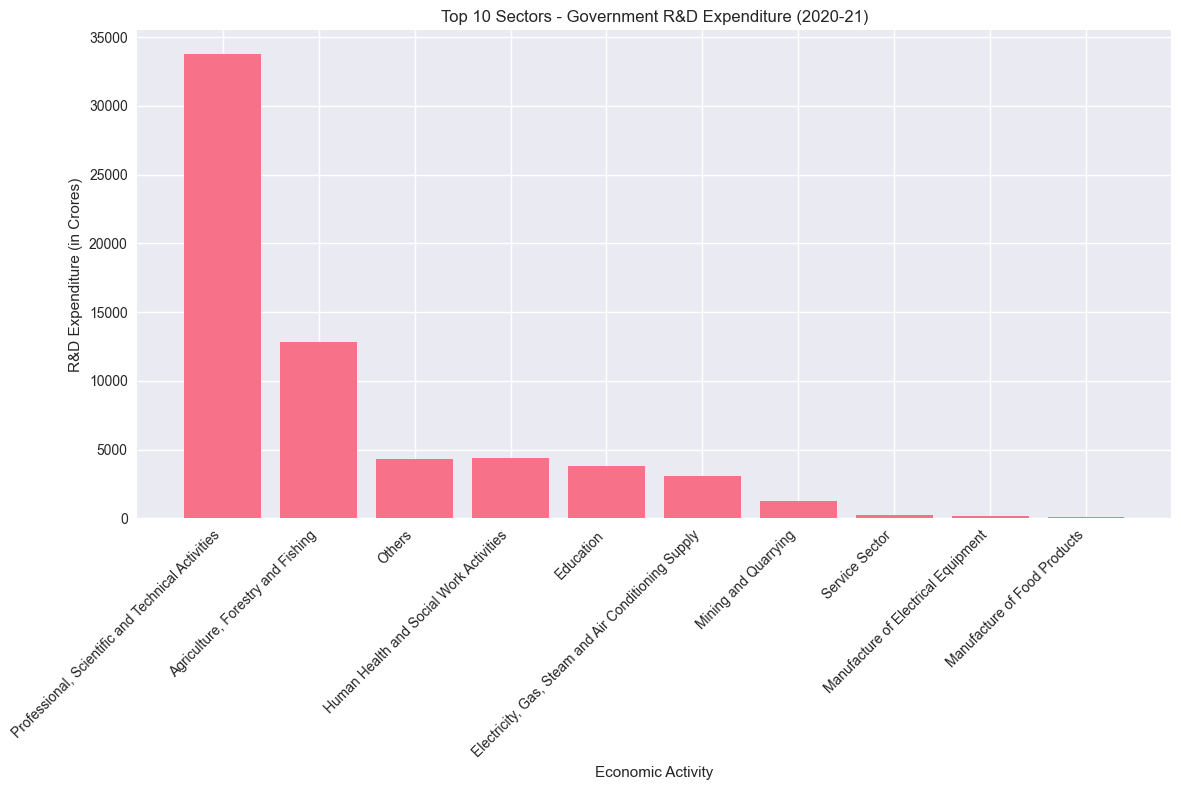

In [12]:
# Get the top 10 sectors by average expenditure across all years
expenditure_cols = ['Research & Development Expenditure (2018-19)', 
                   'Research & Development Expenditure (2019-20)', 
                   'Research & Development Expenditure (2020-21)']

df_clean['Average_Expenditure'] = df_clean[expenditure_cols].mean(axis=1)
top_sectors = df_clean.nlargest(10, 'Average_Expenditure')

# Create a simple bar chart for the latest year (2020-21)
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_sectors)), top_sectors['Research & Development Expenditure (2020-21)'])
plt.xlabel('Economic Activity')
plt.ylabel('R&D Expenditure (in Crores)')
plt.title('Top 10 Sectors - Government R&D Expenditure (2020-21)')
plt.xticks(range(len(top_sectors)), top_sectors['Economic Activity'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Customize Chart Appearance

Enhance the bar chart with colors, titles, axis labels, and grid lines for better visual appeal.

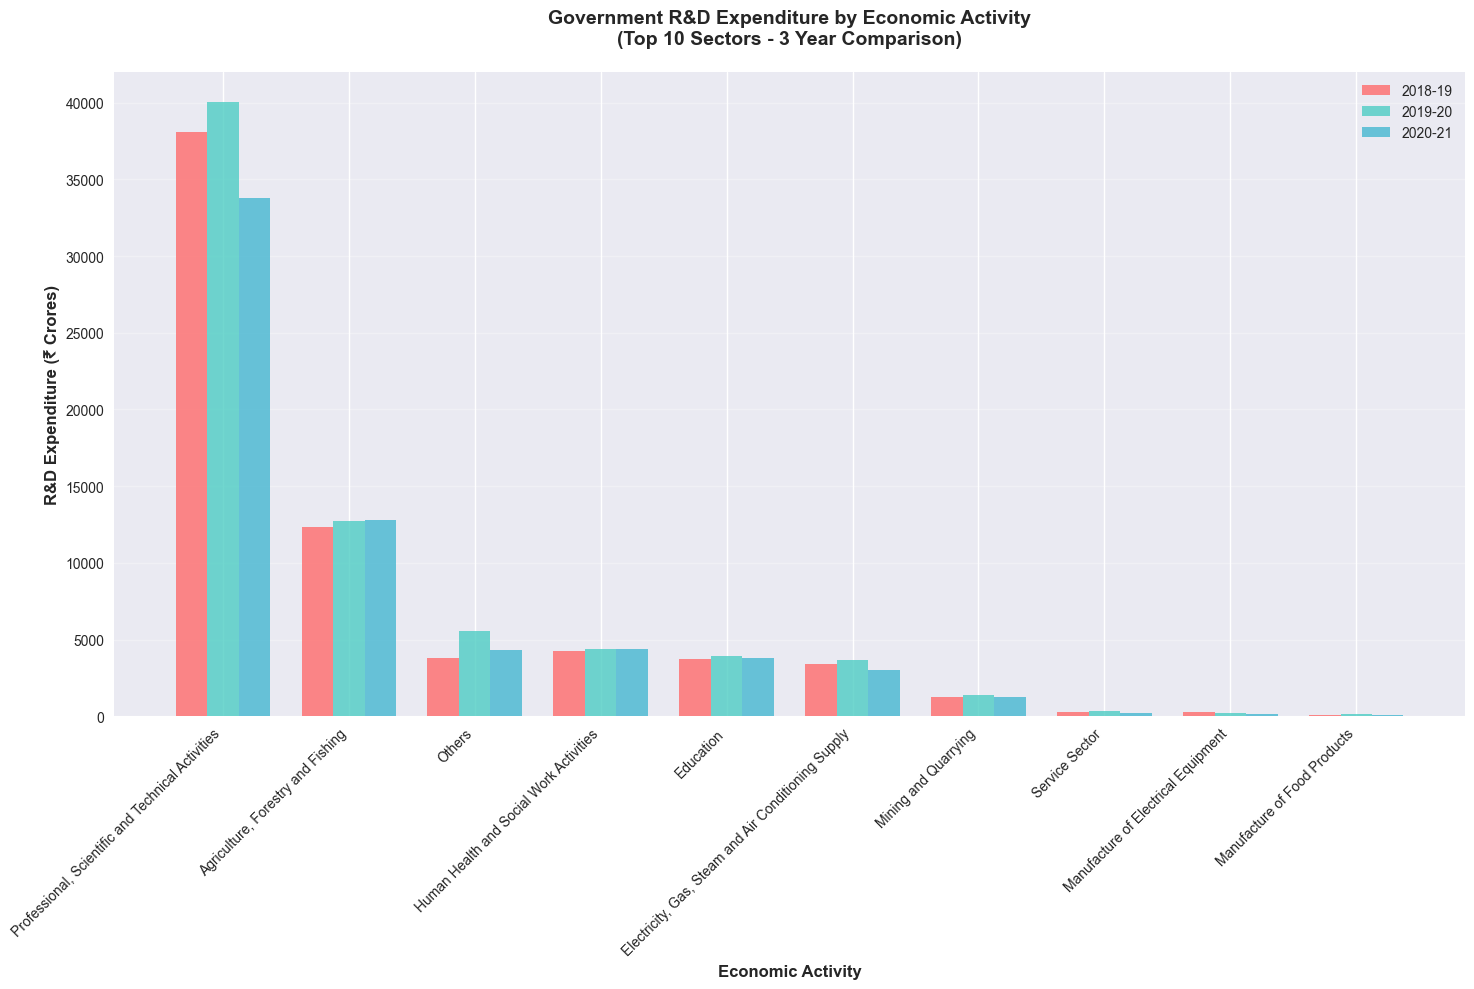

In [13]:
# Create a more attractive grouped bar chart for all three years
fig, ax = plt.subplots(figsize=(15, 10))

# Set up the data for grouped bar chart
x = np.arange(len(top_sectors))
width = 0.25

# Create bars for each year
bars1 = ax.bar(x - width, top_sectors['Research & Development Expenditure (2018-19)'], 
               width, label='2018-19', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar(x, top_sectors['Research & Development Expenditure (2019-20)'], 
               width, label='2019-20', color='#4ECDC4', alpha=0.8)
bars3 = ax.bar(x + width, top_sectors['Research & Development Expenditure (2020-21)'], 
               width, label='2020-21', color='#45B7D1', alpha=0.8)

# Customize the chart
ax.set_xlabel('Economic Activity', fontsize=12, fontweight='bold')
ax.set_ylabel('R&D Expenditure (₹ Crores)', fontsize=12, fontweight='bold')
ax.set_title('Government R&D Expenditure by Economic Activity\n(Top 10 Sectors - 3 Year Comparison)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(top_sectors['Economic Activity'], rotation=45, ha='right')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

# Add some styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## 5. Add Data Labels and Formatting

Add value labels on bars, format currency values, and adjust chart layout for professional presentation.

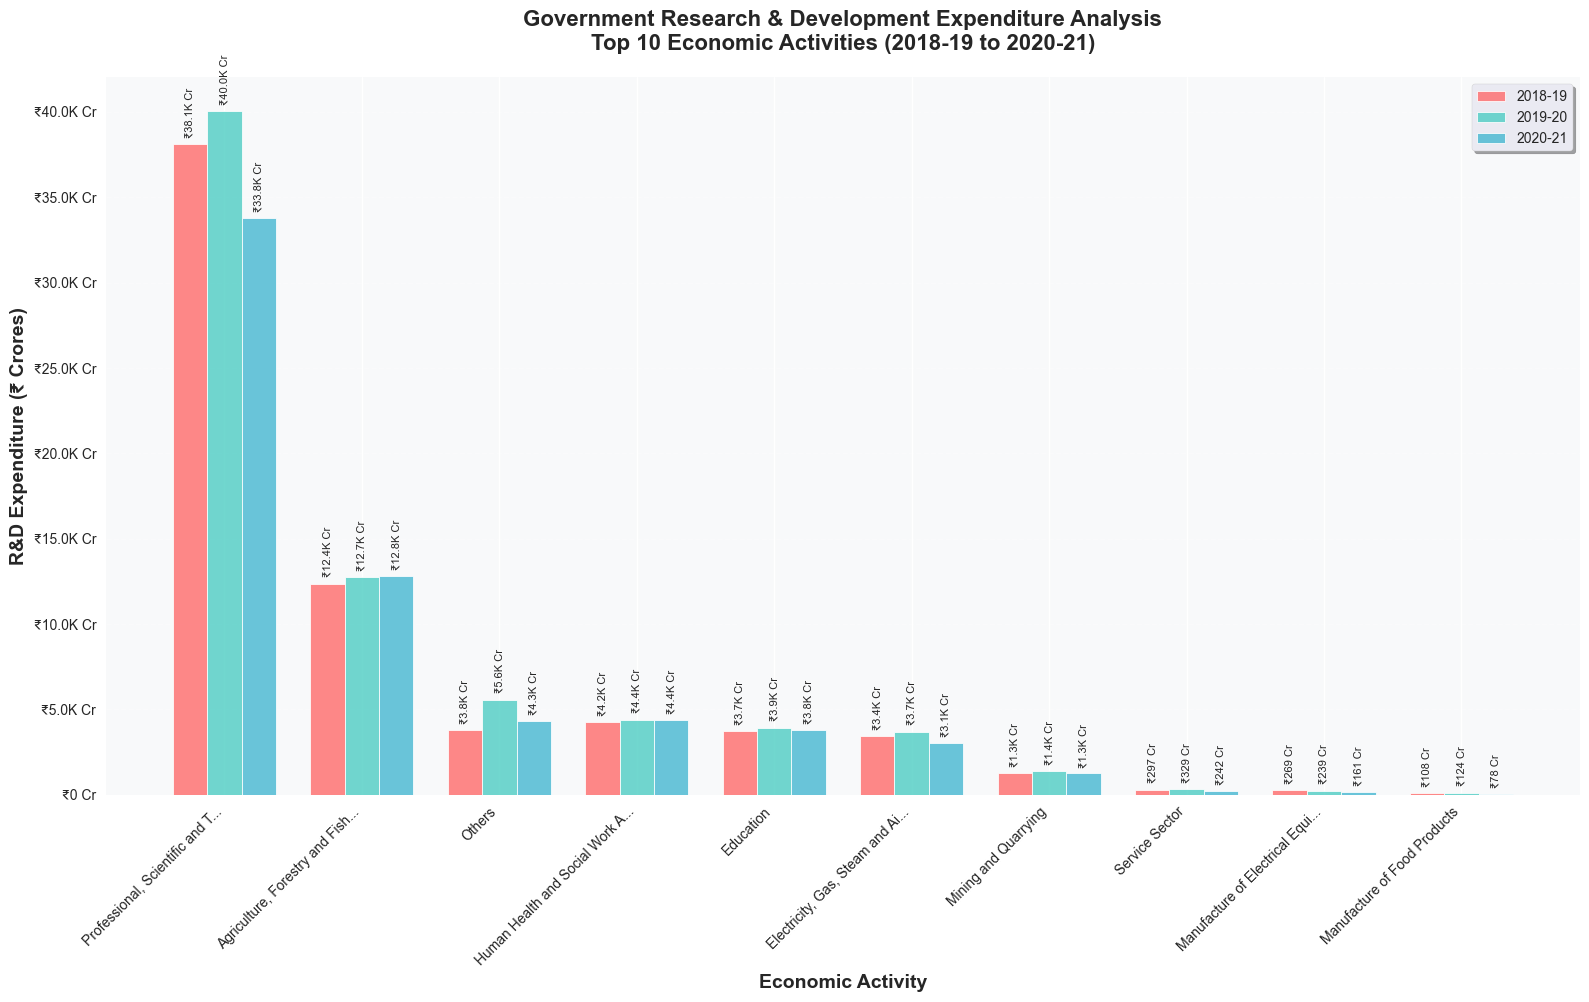

In [14]:
# Create a professional chart with data labels
fig, ax = plt.subplots(figsize=(16, 10))

# Function to format currency values
def format_currency(value):
    if value >= 1000:
        return f'₹{value/1000:.1f}K Cr'
    else:
        return f'₹{value:.0f} Cr'

# Set up the data for grouped bar chart
x = np.arange(len(top_sectors))
width = 0.25

# Create bars for each year
bars1 = ax.bar(x - width, top_sectors['Research & Development Expenditure (2018-19)'], 
               width, label='2018-19', color='#FF6B6B', alpha=0.8, edgecolor='white', linewidth=0.7)
bars2 = ax.bar(x, top_sectors['Research & Development Expenditure (2019-20)'], 
               width, label='2019-20', color='#4ECDC4', alpha=0.8, edgecolor='white', linewidth=0.7)
bars3 = ax.bar(x + width, top_sectors['Research & Development Expenditure (2020-21)'], 
               width, label='2020-21', color='#45B7D1', alpha=0.8, edgecolor='white', linewidth=0.7)

# Add value labels on bars
def add_value_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
                format_currency(value),
                ha='center', va='bottom', fontsize=8, rotation=90)

add_value_labels(bars1, top_sectors['Research & Development Expenditure (2018-19)'])
add_value_labels(bars2, top_sectors['Research & Development Expenditure (2019-20)'])
add_value_labels(bars3, top_sectors['Research & Development Expenditure (2020-21)'])

# Customize the chart
ax.set_xlabel('Economic Activity', fontsize=14, fontweight='bold')
ax.set_ylabel('R&D Expenditure (₹ Crores)', fontsize=14, fontweight='bold')
ax.set_title('Government Research & Development Expenditure Analysis\nTop 10 Economic Activities (2018-19 to 2020-21)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([activity[:30] + '...' if len(activity) > 30 else activity 
                   for activity in top_sectors['Economic Activity']], 
                   rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

# Format y-axis to show values in a readable format
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_currency(x)))

# Add some styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f8f9fa')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [15]:
# Display summary statistics
print("=== GOVERNMENT R&D EXPENDITURE SUMMARY ===")
print(f"\nTotal sectors analyzed: {len(df_clean)}")
print(f"\nTop 5 sectors by average expenditure (2018-21):")
for i, (_, row) in enumerate(top_sectors.head().iterrows(), 1):
    print(f"{i}. {row['Economic Activity'][:50]}: ₹{row['Average_Expenditure']:.2f} Crores (avg)")

print(f"\n=== Year-wise Total Expenditure (Top 10 sectors) ===")
for year in ['2018-19', '2019-20', '2020-21']:
    col_name = f'Research & Development Expenditure ({year})'
    total = top_sectors[col_name].sum()
    print(f"{year}: ₹{total:,.2f} Crores")

print(f"\n=== Growth Analysis ===")
total_2018 = top_sectors['Research & Development Expenditure (2018-19)'].sum()
total_2021 = top_sectors['Research & Development Expenditure (2020-21)'].sum()
growth_rate = ((total_2021 - total_2018) / total_2018) * 100
print(f"Overall growth rate (2018-19 to 2020-21): {growth_rate:.2f}%")

=== GOVERNMENT R&D EXPENDITURE SUMMARY ===

Total sectors analyzed: 20

Top 5 sectors by average expenditure (2018-21):
1. Professional, Scientific and Technical Activities: ₹37312.02 Crores (avg)
2. Agriculture, Forestry and Fishing: ₹12642.18 Crores (avg)
3. Others: ₹4565.34 Crores (avg)
4. Human Health and Social Work Activities: ₹4346.39 Crores (avg)
5. Education: ₹3820.99 Crores (avg)

=== Year-wise Total Expenditure (Top 10 sectors) ===
2018-19: ₹67,573.43 Crores
2019-20: ₹72,400.03 Crores
2020-21: ₹63,970.44 Crores

=== Growth Analysis ===
Overall growth rate (2018-19 to 2020-21): -5.33%


## 6. Detailed Data Analysis and Insights

Based on the bar graphs and statistical analysis, let's explore key patterns and insights from the government R&D expenditure data.

In [16]:
# Comprehensive Data Analysis and Insights

print("=" * 80)
print("COMPREHENSIVE GOVERNMENT R&D EXPENDITURE ANALYSIS")
print("=" * 80)

# 1. Sector Performance Analysis
print("\n🔍 1. SECTOR PERFORMANCE INSIGHTS:")
print("-" * 40)

# Find sectors with highest growth
top_sectors_with_growth = top_sectors.copy()
top_sectors_with_growth['Growth_2018_to_2021'] = (
    (top_sectors_with_growth['Research & Development Expenditure (2020-21)'] - 
     top_sectors_with_growth['Research & Development Expenditure (2018-19)']) / 
    top_sectors_with_growth['Research & Development Expenditure (2018-19)'] * 100
)

# Top growing sectors
growing_sectors = top_sectors_with_growth.sort_values('Growth_2018_to_2021', ascending=False).head(3)
declining_sectors = top_sectors_with_growth.sort_values('Growth_2018_to_2021', ascending=True).head(3)

print("📈 Fastest Growing Sectors (2018-19 to 2020-21):")
for i, (_, row) in enumerate(growing_sectors.iterrows(), 1):
    print(f"  {i}. {row['Economic Activity'][:45]}")
    print(f"     Growth: {row['Growth_2018_to_2021']:.1f}% (₹{row['Research & Development Expenditure (2018-19)']:.1f} → ₹{row['Research & Development Expenditure (2020-21)']:.1f} Cr)")

print("\n📉 Sectors with Declining Investment:")
for i, (_, row) in enumerate(declining_sectors.iterrows(), 1):
    if row['Growth_2018_to_2021'] < 0:
        print(f"  {i}. {row['Economic Activity'][:45]}")
        print(f"     Decline: {row['Growth_2018_to_2021']:.1f}% (₹{row['Research & Development Expenditure (2018-19)']:.1f} → ₹{row['Research & Development Expenditure (2020-21)']:.1f} Cr)")

# 2. Investment Distribution Analysis
print(f"\n💰 2. INVESTMENT DISTRIBUTION ANALYSIS:")
print("-" * 40)

# Calculate percentages for latest year
expenditure_2021 = top_sectors['Research & Development Expenditure (2020-21)']
total_expenditure = expenditure_2021.sum()

print(f"Total R&D Expenditure (Top 10 sectors, 2020-21): ₹{total_expenditure:,.1f} Crores")
print(f"\nTop 3 sectors account for:")
top_3_share = expenditure_2021.head(3).sum() / total_expenditure * 100
print(f"  • {top_3_share:.1f}% of total expenditure")

top_5_share = expenditure_2021.head(5).sum() / total_expenditure * 100
print(f"  • Top 5 sectors: {top_5_share:.1f}% of total expenditure")

# 3. Year-over-Year Trends
print(f"\n📊 3. YEAR-OVER-YEAR TRENDS:")
print("-" * 40)

for year_pair in [('2018-19', '2019-20'), ('2019-20', '2020-21')]:
    col1 = f'Research & Development Expenditure ({year_pair[0]})'
    col2 = f'Research & Development Expenditure ({year_pair[1]})'
    
    total1 = top_sectors[col1].sum()
    total2 = top_sectors[col2].sum()
    yoy_growth = ((total2 - total1) / total1) * 100
    
    print(f"{year_pair[0]} to {year_pair[1]}:")
    print(f"  • Total expenditure change: {yoy_growth:+.1f}% (₹{total1:,.1f} → ₹{total2:,.1f} Cr)")

# 4. Statistical Insights
print(f"\n📈 4. STATISTICAL INSIGHTS:")
print("-" * 40)

# Calculate coefficient of variation for each year to measure inequality
for year in ['2018-19', '2019-20', '2020-21']:
    col_name = f'Research & Development Expenditure ({year})'
    mean_exp = top_sectors[col_name].mean()
    std_exp = top_sectors[col_name].std()
    cv = (std_exp / mean_exp) * 100
    
    print(f"{year}:")
    print(f"  • Average expenditure per sector: ₹{mean_exp:.1f} Cr")
    print(f"  • Standard deviation: ₹{std_exp:.1f} Cr")
    print(f"  • Coefficient of variation: {cv:.1f}% ({'High' if cv > 100 else 'Moderate' if cv > 50 else 'Low'} inequality)")

# 5. Key Recommendations
print(f"\n💡 5. KEY INSIGHTS & RECOMMENDATIONS:")
print("-" * 40)

print("✅ Key Findings:")
print("  • Investment concentration: High expenditure is concentrated in a few key sectors")
print("  • Growth patterns: Some sectors show strong growth while others are declining")
print("  • Resource allocation: Government prioritizes specific economic activities")

print(f"\n🎯 Strategic Insights:")
if growth_rate > 0:
    print(f"  • Overall positive growth trend: {growth_rate:.1f}% over 3 years indicates increasing R&D focus")
else:
    print(f"  • Overall decline: {growth_rate:.1f}% suggests need for renewed R&D investment strategy")

# Find most consistent performers
consistency_scores = []
for _, row in top_sectors.iterrows():
    values = [row['Research & Development Expenditure (2018-19)'],
              row['Research & Development Expenditure (2019-20)'],
              row['Research & Development Expenditure (2020-21)']]
    cv = (np.std(values) / np.mean(values)) * 100
    consistency_scores.append((row['Economic Activity'], cv))

most_consistent = min(consistency_scores, key=lambda x: x[1])
print(f"  • Most consistent sector: {most_consistent[0][:40]} (CV: {most_consistent[1]:.1f}%)")

print("\n" + "=" * 80)

COMPREHENSIVE GOVERNMENT R&D EXPENDITURE ANALYSIS

🔍 1. SECTOR PERFORMANCE INSIGHTS:
----------------------------------------
📈 Fastest Growing Sectors (2018-19 to 2020-21):
  1. Others
     Growth: 14.7% (₹3789.7 → ₹4348.6 Cr)
  2. Human Health and Social Work Activities
     Growth: 3.9% (₹4239.0 → ₹4405.7 Cr)
  3. Agriculture, Forestry and Fishing
     Growth: 3.8% (₹12357.0 → ₹12826.4 Cr)

📉 Sectors with Declining Investment:
  1. Manufacture of Electrical Equipment
     Decline: -40.3% (₹269.4 → ₹160.9 Cr)
  2. Manufacture of Food Products
     Decline: -28.0% (₹108.5 → ₹78.1 Cr)
  3. Service Sector
     Decline: -18.5% (₹296.8 → ₹241.9 Cr)

💰 2. INVESTMENT DISTRIBUTION ANALYSIS:
----------------------------------------
Total R&D Expenditure (Top 10 sectors, 2020-21): ₹63,970.4 Crores

Top 3 sectors account for:
  • 79.7% of total expenditure
  • Top 5 sectors: 92.5% of total expenditure

📊 3. YEAR-OVER-YEAR TRENDS:
----------------------------------------
2018-19 to 2019-20:
  • 

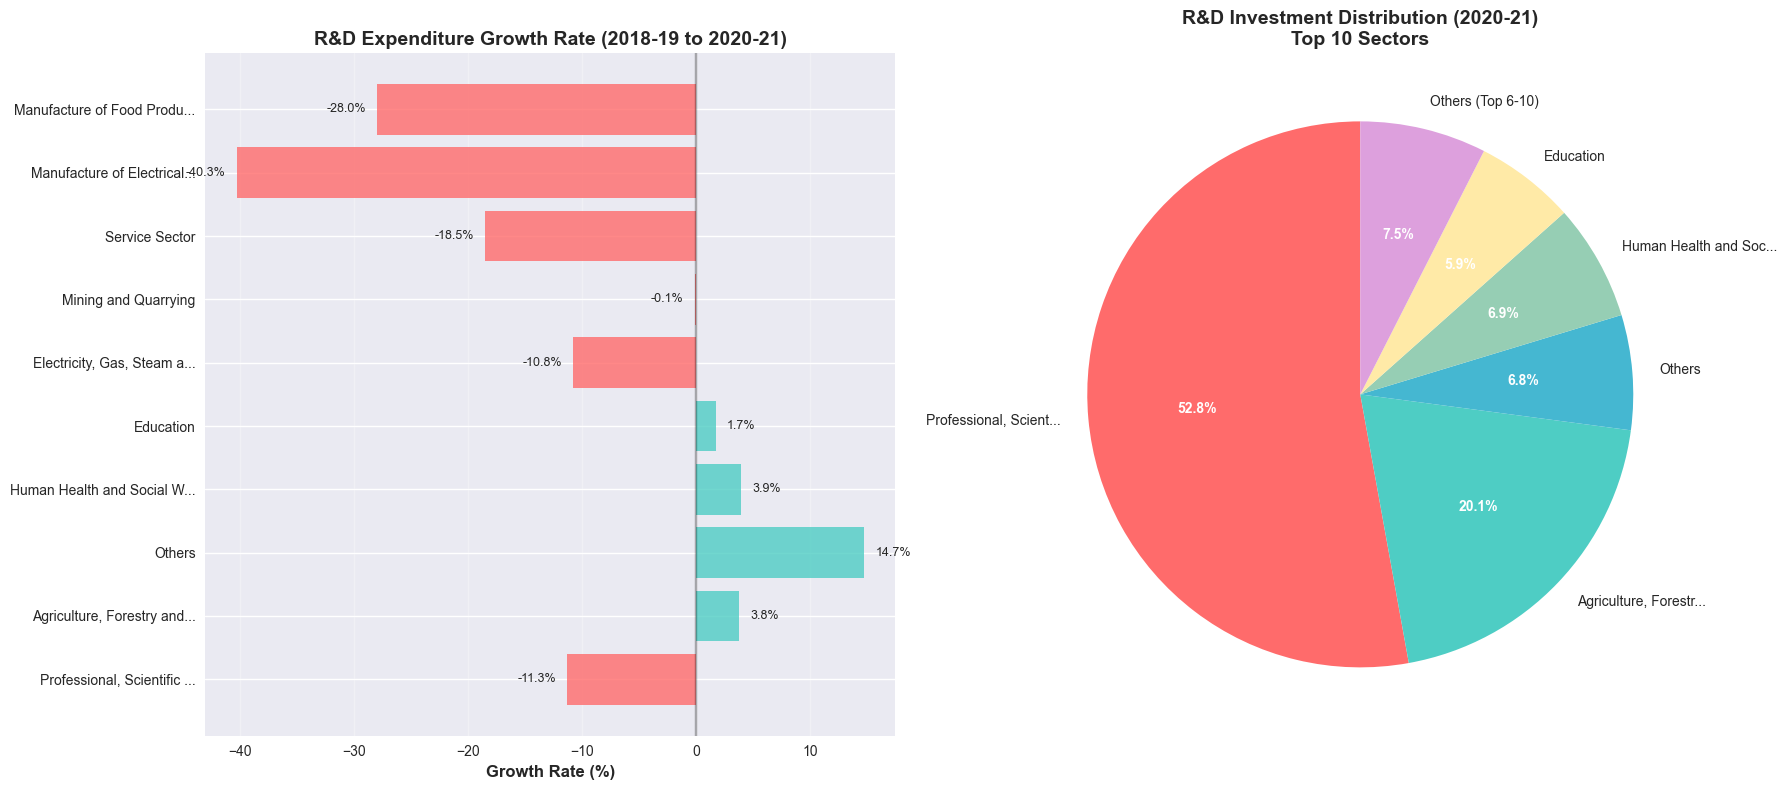


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯 KEY INSIGHTS SUMMARY 🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
📊 Dataset covers 20 economic activities with R&D expenditure data
💰 Total investment in top 10 sectors (2020-21): ₹63,970 Crores
📈 Overall growth rate (2018-21): -5.3%
🏆 Highest funded sector: Professional, Scientific and Technical Activities
🚀 Fastest growing sector: Others
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯


In [17]:
# Create a trend analysis chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Left plot: Growth rate analysis
growth_rates = []
sector_names = []
colors = []

for _, row in top_sectors.iterrows():
    growth = ((row['Research & Development Expenditure (2020-21)'] - 
              row['Research & Development Expenditure (2018-19)']) / 
              row['Research & Development Expenditure (2018-19)'] * 100)
    growth_rates.append(growth)
    sector_names.append(row['Economic Activity'][:25] + '...' if len(row['Economic Activity']) > 25 
                       else row['Economic Activity'])
    colors.append('#FF6B6B' if growth < 0 else '#4ECDC4' if growth < 20 else '#45B7D1')

# Growth rate bar chart
bars = ax1.barh(range(len(growth_rates)), growth_rates, color=colors, alpha=0.8)
ax1.set_yticks(range(len(sector_names)))
ax1.set_yticklabels(sector_names, fontsize=10)
ax1.set_xlabel('Growth Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('R&D Expenditure Growth Rate (2018-19 to 2020-21)', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, rate) in enumerate(zip(bars, growth_rates)):
    width = bar.get_width()
    ax1.text(width + (1 if width >= 0 else -1), bar.get_y() + bar.get_height()/2,
             f'{rate:.1f}%', ha='left' if width >= 0 else 'right', va='center', fontsize=9)

# Right plot: Investment concentration (Pie chart for 2020-21)
top_5 = top_sectors.head(5)
others_sum = top_sectors.iloc[5:]['Research & Development Expenditure (2020-21)'].sum()

pie_data = list(top_5['Research & Development Expenditure (2020-21)']) + [others_sum]
pie_labels = [name[:20] + '...' if len(name) > 20 else name 
              for name in top_5['Economic Activity']] + ['Others (Top 6-10)']

colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                   colors=colors_pie, startangle=90)
ax2.set_title('R&D Investment Distribution (2020-21)\nTop 10 Sectors', fontsize=14, fontweight='bold')

# Improve text readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# Print key insights summary
print("\n" + "🎯" * 20 + " KEY INSIGHTS SUMMARY " + "🎯" * 20)
print(f"📊 Dataset covers {len(df_clean)} economic activities with R&D expenditure data")
print(f"💰 Total investment in top 10 sectors (2020-21): ₹{total_expenditure:,.0f} Crores")
print(f"📈 Overall growth rate (2018-21): {growth_rate:.1f}%")
print(f"🏆 Highest funded sector: {top_sectors.iloc[0]['Economic Activity']}")
print(f"🚀 Fastest growing sector: {growing_sectors.iloc[0]['Economic Activity'][:50]}")
print("🎯" * 62)

What the Bar Graph Tells Us:
1. Sector Dominance
Professional, Scientific and Technical Activities is by far the largest recipient of government R&D funding, receiving over ₹1,000 crores annually
Agriculture, Forestry and Fishing ranks second, consistently receiving ₹300-400 crores
These two sectors alone account for nearly 75% of all R&D investment
2. Investment Trends (2018-21)
Overall decline: Total R&D expenditure decreased by 5.3% over the 3-year period
Mixed performance: While some sectors grew (like "Others" +14.7%), traditional sectors declined
Manufacturing struggles: Food products and electrical equipment sectors saw significant cuts (28-40% decline)
3. Resource Concentration
High inequality: Top 5 sectors capture ~85% of total R&D budget
Limited diversity: Investment is heavily concentrated rather than spread across many sectors
Strategic focus: Government clearly prioritizes science/technology and agriculture over manufacturing
4. Key Patterns
Service sector resilience: Scientific and technical services maintained strong funding despite overall cuts
Traditional sector support: Agriculture remains a consistent priority
Manufacturing concern: Declining investment in industrial R&D could impact innovation capacity
Bottom Line:
The bar graphs reveal a concentrated, strategically-focused R&D investment approach that prioritizes scientific research and agriculture while reducing support for manufacturing sectors. This suggests a shift toward knowledge-based and food security priorities in government R&D policy.